In [1]:
import sys
from os import path
import os
from scipy.spatial.distance import cdist
import numpy as np
import datetime
import pandas as pd
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from scipy.stats import gaussian_kde
import matplotlib.lines as mlines
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib.offsetbox import AnchoredText
from datetime import datetime as dt
import utide

In [2]:
def datenumaz(d):
    return 366 + d.toordinal() + (d - dt.fromordinal(d.toordinal())).total_seconds()/(24*60*60)

In [3]:
basefol = '/Users/amrozeidan/Documents/hiwi/easygshpy/base'

In [4]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
df_simul = pd.read_csv(path.join(basefol, 'telemac_variables','variables_all_stations' ,'free_surface_all_stations.dat' ) , 
                           header =0 , parse_dates = ['date'],date_parser = dateparse, index_col =0 , squeeze=True)
df_simul.set_index('date' , inplace = True)
df_simul

,Roscoff,StMalo,StHelierJersey,Cherbourg,LeHavre,Antifer,Dieppe,Boulogne,Calais,Dunkerque,...,Wierumergronden,Schiermannskoog,Lauwersoog,Huibertgat,BorkumS,BorkumF,Emshoern,Eemshaven,Dukegat,Delfzijl
date,,,,,,,,,,,,,,,,,,,,,
2015-01-06 00:00:00,-3.077342,-2.078520,-1.448774,0.915410,2.872966,3.022305,3.899223,3.453816,2.341209,1.395777,...,0.610120,1.156833,1.099325,0.967301,1.213985,1.330583,1.390983,1.407176,1.433399,1.444366
2015-01-06 00:10:00,-3.237792,-2.409397,-1.766929,0.738466,2.849072,3.023163,3.997797,3.614916,2.541929,1.671727,...,0.517727,1.101081,1.036836,0.886085,1.165504,1.301711,1.375816,1.393922,1.430602,1.454116
2015-01-06 00:20:00,-3.362437,-2.720419,-2.094769,0.589682,2.811419,3.009843,4.103075,3.737375,2.692562,1.905376,...,0.421623,1.037987,0.968140,0.795198,1.103759,1.260080,1.347809,1.368150,1.419434,1.458050
2015-01-06 00:30:00,-3.441948,-3.016208,-2.397147,0.437518,2.784743,2.970931,4.163237,3.788049,2.819094,2.110469,...,0.323882,0.970579,0.896396,0.696972,1.031731,1.205152,1.306874,1.329737,1.396626,1.456069
2015-01-06 00:40:00,-3.496505,-3.306890,-2.671501,0.239993,2.734252,2.911422,4.206853,3.845502,2.896434,2.260471,...,0.223830,0.898404,0.821673,0.591312,0.950239,1.138690,1.253037,1.277388,1.360903,1.447226
2015-01-06 00:50:00,-3.535882,-3.611383,-2.959901,0.043884,2.700744,2.845014,4.215614,3.895777,2.956033,2.378900,...,0.124166,0.823929,0.745704,0.480694,0.862152,1.062695,1.187716,1.212732,1.311972,1.427301
2015-01-06 01:00:00,-3.530883,-3.905649,-3.228913,-0.123798,2.625614,2.772796,4.147752,3.906502,3.002980,2.476306,...,0.023940,0.747972,0.667647,0.365730,0.768540,0.979803,1.113112,1.137913,1.250734,1.396029
2015-01-06 01:10:00,-3.500746,-4.185069,-3.475717,-0.284185,2.532588,2.650698,4.041566,3.899200,3.033301,2.540723,...,-0.074924,0.672164,0.588174,0.248752,0.667824,0.891269,1.030885,1.054448,1.179163,1.353500
2015-01-06 01:20:00,-3.452023,-4.417114,-3.691983,-0.488194,2.416065,2.511663,3.904344,3.854985,3.039341,2.624182,...,-0.172723,0.594997,0.506632,0.131695,0.561480,0.796787,0.942743,0.964587,1.100466,1.300998


In [5]:
dates = df_simul.index.tolist()
dates

[Timestamp('2015-01-06 00:00:00'),
 Timestamp('2015-01-06 00:10:00'),
 Timestamp('2015-01-06 00:20:00'),
 Timestamp('2015-01-06 00:30:00'),
 Timestamp('2015-01-06 00:40:00'),
 Timestamp('2015-01-06 00:50:00'),
 Timestamp('2015-01-06 01:00:00'),
 Timestamp('2015-01-06 01:10:00'),
 Timestamp('2015-01-06 01:20:00'),
 Timestamp('2015-01-06 01:30:00'),
 Timestamp('2015-01-06 01:40:00'),
 Timestamp('2015-01-06 01:50:00'),
 Timestamp('2015-01-06 02:00:00'),
 Timestamp('2015-01-06 02:10:00'),
 Timestamp('2015-01-06 02:20:00'),
 Timestamp('2015-01-06 02:30:00'),
 Timestamp('2015-01-06 02:40:00'),
 Timestamp('2015-01-06 02:50:00'),
 Timestamp('2015-01-06 03:00:00'),
 Timestamp('2015-01-06 03:10:00'),
 Timestamp('2015-01-06 03:20:00'),
 Timestamp('2015-01-06 03:30:00'),
 Timestamp('2015-01-06 03:40:00'),
 Timestamp('2015-01-06 03:50:00'),
 Timestamp('2015-01-06 04:00:00'),
 Timestamp('2015-01-06 04:10:00'),
 Timestamp('2015-01-06 04:20:00'),
 Timestamp('2015-01-06 04:30:00'),
 Timestamp('2015-01-

In [6]:
date_num = list(map(datenumaz,df_simul.index.tolist()))
date_num

[735970.0,
 735970.0069444445,
 735970.0138888889,
 735970.0208333334,
 735970.0277777778,
 735970.0347222222,
 735970.0416666666,
 735970.0486111111,
 735970.0555555555,
 735970.0625,
 735970.0694444445,
 735970.0763888889,
 735970.0833333334,
 735970.0902777778,
 735970.0972222222,
 735970.1041666666,
 735970.1111111111,
 735970.1180555555,
 735970.125,
 735970.1319444445,
 735970.1388888889,
 735970.1458333334,
 735970.1527777778,
 735970.1597222222,
 735970.1666666666,
 735970.1736111111,
 735970.1805555555,
 735970.1875,
 735970.1944444445,
 735970.2013888889,
 735970.2083333334,
 735970.2152777778,
 735970.2222222222,
 735970.2291666666,
 735970.2361111111,
 735970.2430555555,
 735970.25,
 735970.2569444445,
 735970.2638888889,
 735970.2708333334,
 735970.2777777778,
 735970.2847222222,
 735970.2916666666,
 735970.2986111111,
 735970.3055555555,
 735970.3125,
 735970.3194444445,
 735970.3263888889,
 735970.3333333334,
 735970.3402777778,
 735970.3472222222,
 735970.3541666666,
 7

In [7]:
elevations = df_simul['BorkumS'].to_numpy()
elevations

array([1.21398497, 1.16550434, 1.10375941, ..., 0.05524478, 0.16234304,
       0.26036274])

In [10]:
pTides = ['MM','MF','Q1','O1','K1','SO1','MU2','N2','NU2','M2','S2','2SM2','MO3','MN4','M4'
          ,'MS4','MK4','S4','M6','2MS6','S6','M8','M10','M12' ] 

In [35]:
coef = utide.solve(np.asarray(date_num) , np.asarray(elevations) , lat = 53.5769289 , constit = pTides)

solve: matrix prep ... solution ... diagnostics ... done.


In [36]:
coef

{'name': array(['MM', 'NU2', 'N2', 'MF', 'M2', 'MU2', 'MK4', 'MS4', 'S2', 'O1',
        'M4', 'Q1', 'MN4', '2SM2', 'K1', 'S4', 'SO1', '2MS6', 'MO3', 'M6',
        'S6', 'M8', 'M10', 'M12'], dtype=object),
 'aux': {'frq': array([0.00151215, 0.07920162, 0.07899925, 0.00305009, 0.0805114 ,
         0.07768947, 0.16407289, 0.16384473, 0.08333333, 0.03873065,
         0.1610228 , 0.0372185 , 0.15951065, 0.08615527, 0.04178075,
         0.16666667, 0.04460268, 0.24435613, 0.11924206, 0.2415342 ,
         0.25      , 0.3220456 , 0.402557  , 0.4830684 ]),
  'lind': array([  4,  42,  41,   6,  47,  39,  86,  85,  56,  12,  81,  10,  78,
          62,  20,  88,  26, 109,  67, 105, 114, 124, 137, 143]),
  'reftime': 735974.0,
  'opt': {'twodim': False,
   'equi': True,
   'conf_int': True,
   'cnstit': ['MM',
    'MF',
    'Q1',
    'O1',
    'K1',
    'SO1',
    'MU2',
    'N2',
    'NU2',
    'M2',
    'S2',
    '2SM2',
    'MO3',
    'MN4',
    'M4',
    'MS4',
    'MK4',
    'S4',
    'M6',
 

In [37]:
coef.name

array(['MM', 'NU2', 'N2', 'MF', 'M2', 'MU2', 'MK4', 'MS4', 'S2', 'O1',
       'M4', 'Q1', 'MN4', '2SM2', 'K1', 'S4', 'SO1', '2MS6', 'MO3', 'M6',
       'S6', 'M8', 'M10', 'M12'], dtype=object)

In [38]:
coef.A

array([2.42579224e+02, 1.07408697e+02, 1.02371187e+02, 3.55693508e+01,
       1.34739514e+01, 5.57110393e+00, 4.45326308e+00, 3.49031977e+00,
       1.61842914e+00, 6.64117619e-01, 5.57781271e-01, 5.02275044e-01,
       2.82425470e-01, 2.59429390e-01, 1.59311719e-01, 9.70032249e-02,
       9.30903073e-02, 5.57299916e-02, 3.08255194e-02, 2.41679929e-02,
       1.16858433e-02, 4.80485784e-03, 2.64982663e-03, 1.39110443e-03])

In [39]:
coef.g

array([197.54386661, 163.57764984, 156.23540215, 334.85990726,
        74.22041369, 243.59701307,  48.57623566,  10.27162792,
       289.65512412,   7.1752435 , 158.33772567, 269.86433843,
        48.68670921, 122.71585177, 250.18568324,  67.1172496 ,
        68.11157495, 119.55407093, 283.61929159, 226.03020146,
        89.95377563, 345.9149186 , 276.90251692, 190.50127948])

In [46]:
 d = {'a_python': coef.A, 'g_python': coef.g}
df_py = pd.DataFrame(data= d,  index=coef.name)
df_py

,a_python,g_python
MM,242.579224,197.543867
NU2,107.408697,163.577650
N2,102.371187,156.235402
MF,35.569351,334.859907
M2,13.473951,74.220414
MU2,5.571104,243.597013
MK4,4.453263,48.576236
MS4,3.490320,10.271628
S2,1.618429,289.655124
O1,0.664118,7.175243


In [47]:
df_simul_matlab_a = pd.read_csv('/Users/amrozeidan/Downloads/EAZYgsh tools/testing_for_nico/base/coef_simulated/A_simul_all_stations.dat')
df_simul_matlab_a.set_index('tide' , inplace = True)
df_simul_matlab_a.head()

,Emshoern,Eemshaven,Dukegat,Delfzijl,BorkumS
tide,,,,,
MM,289.555357,292.882322,310.621050,334.931412,244.696079
NU2,191.368253,194.597297,199.142857,206.131317,168.011043
N2,181.375247,184.479048,188.825634,195.270159,159.121604
MF,42.312405,42.784532,45.332860,48.703205,35.877572
M2,23.012729,23.367411,23.926685,25.040884,20.260128


In [48]:
a = df_simul_matlab_a.loc[: , ['BorkumS']]
a.columns = ['a_matlab']


In [49]:
df_simul_matlab_g = pd.read_csv('/Users/amrozeidan/Downloads/EAZYgsh tools/testing_for_nico/base/coef_simulated/g_simul_all_stations.dat')
df_simul_matlab_g.set_index('tide' , inplace = True)
df_simul_matlab_g.head()

,Emshoern,Eemshaven,Dukegat,Delfzijl,BorkumS
tide,,,,,
MM,96.804670,96.812702,96.795143,96.787278,96.815861
NU2,275.304019,276.175337,281.189305,286.058272,262.336655
N2,188.269355,189.147377,194.194966,199.136112,175.251248
MF,51.924798,51.950114,51.930936,52.009440,51.879608
M2,5.236390,6.040082,10.897496,15.668607,352.443757


In [50]:
g = df_simul_matlab_g.loc[: , ['BorkumS']]
g.columns = ['g_matlab']

In [51]:
dfmat = g.join(a, how = 'inner')
dfall = df_py.join(dfmat , how = 'inner')
dfall = dfall.sort_index(axis = 1)
dfall

,a_matlab,a_python,g_matlab,g_python
MM,244.696079,242.579224,96.815861,197.543867
NU2,168.011043,107.408697,262.336655,163.577650
N2,159.121604,102.371187,175.251248,156.235402
MF,35.877572,35.569351,51.879608,334.859907
M2,20.260128,13.473951,352.443757,74.220414
MU2,9.055363,5.571104,85.587771,243.597013
MK4,4.215817,4.453263,280.933255,48.576236
MS4,3.370687,3.490320,238.599329,10.271628
S2,2.287778,1.618429,274.415073,289.655124
O1,0.611210,0.664118,322.959148,7.175243


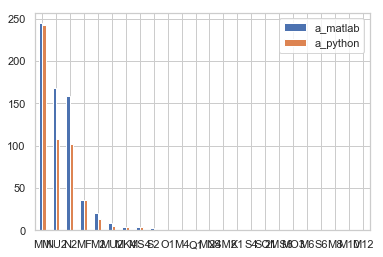

In [57]:
dfall.loc[: ,['a_matlab' , 'a_python']].plot.bar(rot=0)

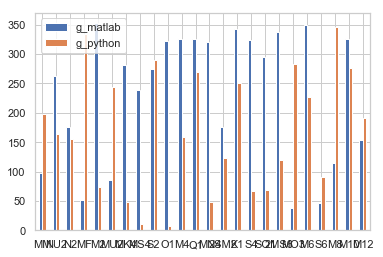

In [58]:
dfall.loc[: ,['g_matlab' , 'g_python']].plot.bar(rot=0)